import pandas as pd 

In [100]:
import pandas as pd
import numpy as np

In [101]:
df1 = pd.read_csv('bank-data.csv')
df2 = pd.read_csv('banklist.csv',encoding='windows-1252')
df1.columns = df1.columns.str.lower()
df2.columns = df2.columns.str.lower()
df2.columns = df2.columns.str.rstrip()
df1

,cert,chclass1,cityst,cost,faildate,fin,id,name,qbfasset,qbfdep,restype,restype1,savr
0,59017,NM,"SAN FRANCISCO, CA",NaN,5/1/2023,10543,4107,FIRST REPUBLIC BANK,212638872,176436706,FAILURE,PA,DIF
1,57053,NM,"NEW YORK, NY",2400000.0,3/12/2023,10540,4106,SIGNATURE BANK,110363650,88612911,FAILURE,PA,DIF
2,24735,SM,"SANTA CLARA, CA",16100000.0,3/7/2023,10539,4105,SILICON VALLEY BANK,209026000,175378000,FAILURE,PA,DIF
3,15426,NM,"ALMENA, KS",16330.0,10/23/2020,10538,4104,ALMENA STATE BANK,65733,64941,FAILURE,PA,DIF
4,16748,NM,"FORT WALTON BEACH, FL",7247.0,10/16/2020,10537,4103,FIRST CITY BANK OF FLORIDA,136566,133936,FAILURE,PA,DIF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,338,NM,"FALKNER, MS",14592.0,9/29/2000,4644,3528,BANK OF FALKNER,85485,77140,FAILURE,PI,BIF
580,10985,NM,"ALMELUND, MN",1363.0,7/14/2000,4643,3527,TOWN & COUNTRY BANK OF ALMELUND,25942,26667,FAILURE,PI,BIF
581,25056,N,"RIDGECREST, CA",617.0,6/2/2000,4642,3526,MONUMENT NATIONAL BANK,7923,7680,FAILURE,PA,BIF
582,27886,SB,"ATLANTA, GA",1322.0,3/10/2000,6003,3525,MUTUAL FEDERAL SAVINGS BANK OF ATLANTA,31479,32234,FAILURE,PA,SAIF


In [102]:
df = pd.merge(df1 , df2, on = 'cert')
df.head()

,cert,chclass1,cityst,cost,faildate,fin,id,name,qbfasset,qbfdep,restype,restype1,savr,bank name,city,state,acquiring institution,closing date,fund
0,59017,NM,"SAN FRANCISCO, CA",NaN,5/1/2023,10543,4107,FIRST REPUBLIC BANK,212638872,176436706,FAILURE,PA,DIF,First Republic Bank,San Francisco,CA,"JPMorgan Chase Bank, N.A.",1-May-23,10543
1,57053,NM,"NEW YORK, NY",2400000.0,3/12/2023,10540,4106,SIGNATURE BANK,110363650,88612911,FAILURE,PA,DIF,Signature Bank,New York,NY,"Flagstar Bank, N.A.",12-Mar-23,10540
2,24735,SM,"SANTA CLARA, CA",16100000.0,3/7/2023,10539,4105,SILICON VALLEY BANK,209026000,175378000,FAILURE,PA,DIF,Silicon Valley Bank,Santa Clara,CA,First–Citizens Bank & Trust Company,10-Mar-23,10539
3,15426,NM,"ALMENA, KS",16330.0,10/23/2020,10538,4104,ALMENA STATE BANK,65733,64941,FAILURE,PA,DIF,Almena State Bank,Almena,KS,Equity Bank,23-Oct-20,10538
4,16748,NM,"FORT WALTON BEACH, FL",7247.0,10/16/2020,10537,4103,FIRST CITY BANK OF FLORIDA,136566,133936,FAILURE,PA,DIF,First City Bank of Florida,Fort Walton Beach,FL,"United Fidelity Bank, fsb",16-Oct-20,10537


In [103]:
columns = ['fin','id','city','closing date','fund','bank name','cityst']
df = df.drop(columns, axis=1)


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cert                   566 non-null    int64  
 1   chclass1               566 non-null    object 
 2   cost                   564 non-null    float64
 3   faildate               566 non-null    object 
 4   name                   566 non-null    object 
 5   qbfasset               566 non-null    int64  
 6   qbfdep                 566 non-null    int64  
 7   restype                566 non-null    object 
 8   restype1               566 non-null    object 
 9   savr                   566 non-null    object 
 10  state                  566 non-null    object 
 11  acquiring institution  566 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 53.2+ KB


In [105]:
df.isna().sum()

cert                     0
chclass1                 0
cost                     2
faildate                 0
name                     0
qbfasset                 0
qbfdep                   0
restype                  0
restype1                 0
savr                     0
state                    0
acquiring institution    0
dtype: int64

In [106]:
df = df.fillna(0)
df.isna().sum()

cert                     0
chclass1                 0
cost                     0
faildate                 0
name                     0
qbfasset                 0
qbfdep                   0
restype                  0
restype1                 0
savr                     0
state                    0
acquiring institution    0
dtype: int64

In [107]:
state_wise = df.groupby('state')['state'].count()\
                                         .reset_index(name = 'count')\
                                         .sort_values(['count'], ascending=False)\
                                         
state_wise.head(5)

,state,count
7,GA,93
6,FL,76
11,IL,69
3,CA,43
19,MN,23


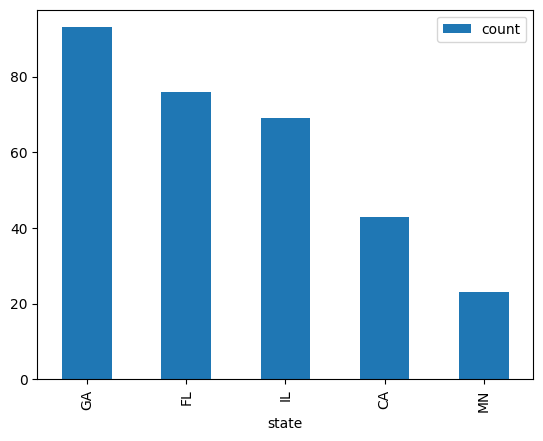

In [108]:
import matplotlib.pyplot as plt

state_wise.head(5).plot(x='state', kind='bar')
plt.show()

In [109]:
df['faildate'] = pd.to_datetime(df['faildate'])
df['year'] = df['faildate'].dt.year
df['month']=df['faildate'].dt.month

In [110]:
df_filtered = df[df['faildate'].dt.strftime('%Y') == '2021'].cost.sum()
df_filtered

0.0

In [111]:
df_new = df[df['faildate'].dt.strftime('%Y') == '2023']
df_new


,cert,chclass1,cost,faildate,name,qbfasset,qbfdep,restype,restype1,savr,state,acquiring institution,year,month
0,59017,NM,0.0,2023-05-01,FIRST REPUBLIC BANK,212638872,176436706,FAILURE,PA,DIF,CA,"JPMorgan Chase Bank, N.A.",2023,5
1,57053,NM,2400000.0,2023-03-12,SIGNATURE BANK,110363650,88612911,FAILURE,PA,DIF,NY,"Flagstar Bank, N.A.",2023,3
2,24735,SM,16100000.0,2023-03-07,SILICON VALLEY BANK,209026000,175378000,FAILURE,PA,DIF,CA,First–Citizens Bank & Trust Company,2023,3


In [112]:
df['Month_Year'] = df['faildate'].dt.to_period('M')
df

,cert,chclass1,cost,faildate,name,qbfasset,qbfdep,restype,restype1,savr,state,acquiring institution,year,month,Month_Year
0,59017,NM,0.0,2023-05-01,FIRST REPUBLIC BANK,212638872,176436706,FAILURE,PA,DIF,CA,"JPMorgan Chase Bank, N.A.",2023,5,2023-05
1,57053,NM,2400000.0,2023-03-12,SIGNATURE BANK,110363650,88612911,FAILURE,PA,DIF,NY,"Flagstar Bank, N.A.",2023,3,2023-03
2,24735,SM,16100000.0,2023-03-07,SILICON VALLEY BANK,209026000,175378000,FAILURE,PA,DIF,CA,First–Citizens Bank & Trust Company,2023,3,2023-03
3,15426,NM,16330.0,2020-10-23,ALMENA STATE BANK,65733,64941,FAILURE,PA,DIF,KS,Equity Bank,2020,10,2020-10
4,16748,NM,7247.0,2020-10-16,FIRST CITY BANK OF FLORIDA,136566,133936,FAILURE,PA,DIF,FL,"United Fidelity Bank, fsb",2020,10,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,32646,SB,286673.0,2001-07-27,"SUPERIOR BANK, FSB",1765455,1609501,FAILURE,PI,SAIF,IL,"Superior Federal, FSB",2001,7,2001-07
562,6629,N,769.0,2001-05-03,MALTA NATIONAL BANK,9075,8728,FAILURE,PA,BIF,OH,North Valley Bank,2001,5,2001-05
563,34264,NM,817.0,2001-02-02,FIRST ALLIANCE BANK AND TRUST CO,17438,16931,FAILURE,PA,BIF,NH,Southern New Hampshire Bank & Trust,2001,2,2001-02
564,3815,N,2670.0,2000-12-14,NATIONAL STATE BANK OF METROPOLIS,90397,71277,FAILURE,PI,BIF,IL,Banterra Bank of Marion,2000,12,2000-12


In [113]:
ndf = df.groupby(['year','month'])['month'].count().reset_index(name='count')
ndf

,year,month,count
0,2000,10,1
1,2000,12,1
2,2001,2,1
3,2001,5,1
4,2001,7,1
...,...,...,...
117,2020,2,1
118,2020,4,1
119,2020,10,2
120,2023,3,2


In [114]:
ndf2 = df.groupby(['year','month'])['cost'].sum().reset_index(name = 'total_loss')
ndf2

,year,month,total_loss
0,2000,10,400.0
1,2000,12,2670.0
2,2001,2,817.0
3,2001,5,769.0
4,2001,7,286673.0
...,...,...,...
117,2020,2,24465.0
118,2020,4,45328.0
119,2020,10,23577.0
120,2023,3,18500000.0


In [115]:
merge_df = pd.merge(ndf,ndf2)
merge_df 

,year,month,count,total_loss
0,2000,10,1,400.0
1,2000,12,1,2670.0
2,2001,2,1,817.0
3,2001,5,1,769.0
4,2001,7,1,286673.0
...,...,...,...,...
117,2020,2,1,24465.0
118,2020,4,1,45328.0
119,2020,10,2,23577.0
120,2023,3,2,18500000.0


In [116]:
merge_df = merge_df[merge_df['year']==2002]
merge_df

,year,month,count,total_loss
6,2002,1,2,106322.0
7,2002,2,2,227647.0
8,2002,3,2,4440.0
9,2002,6,2,54058.0
10,2002,9,1,1326.0
11,2002,11,1,9316.0
12,2002,12,1,12205.0


In [117]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=merge_df['month'], y=merge_df['count'], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=merge_df['month'], y=merge_df['total_loss'], name="yaxis2 data"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()

In [118]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=merge_df['month'], y=merge_df['count'], name="yaxis data"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=merge_df['month'], y=merge_df['total_loss'], name="yaxis2 data"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Double Y Axis Example"
)

# Set x-axis title
fig.update_xaxes(title_text="xaxis title")

# Set y-axes titles
fig.update_yaxes(title_text="<b>primary</b> yaxis title", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> yaxis title", secondary_y=True)

fig.show()